In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

In [107]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [109]:
df.e.value_counts()

1    663522
Name: e, dtype: int64

In [110]:
df.drop(columns='e', axis=1, inplace=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [111]:
df.shape

(663522, 8)

### clean 'desc' column- 
keep Station info.

In [112]:
df.desc

0         REINDEER CT & DEAD END;  NEW HANOVER; Station ...
1         BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...
2         HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...
3         AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...
4         CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...
                                ...                        
663517    SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...
663518    EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE...
663519    HAVERFORD STATION RD;  LOWER MERION; Station 3...
663520    MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...
663521    HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...
Name: desc, Length: 663522, dtype: object

In [113]:
Station=[]
for i in range(len(df.desc)):
    index=re.search('Station',df.desc.iloc[i])
    if index==None:
        Station.append(None)
    else:
        x = index.end()
        Station.append(df.desc.iloc[i][x:].split(';')[0])
        
Station

[' 332',
 ' 345',
 ':STA27',
 ' 308A',
 ' 329',
 ' 345',
 ' 352',
 ' 336',
 ' 344',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ' 345B',
 ' 332',
 ' 308A',
 None,
 None,
 None,
 ':STA80',
 None,
 None,
 ' 322A',
 ' 385',
 ':STA23',
 None,
 None,
 None,
 ' 339',
 ' 308A',
 None,
 None,
 None,
 None,
 ' 313A',
 None,
 ':STA49',
 ' 308',
 None,
 ' 313',
 None,
 ' 324A',
 ':STA51',
 None,
 None,
 ' 345B',
 ':STA33',
 None,
 ' 332',
 ':STA24',
 None,
 ' 381',
 ' 322A',
 ' 358A',
 ' 329',
 None,
 None,
 None,
 ' 318',
 ' 345',
 ' 345',
 ' 308A',
 ' 317',
 ' 344',
 ' 345B',
 ' 322A',
 ' 351',
 ':STA24',
 ' 313',
 ' 345A',
 ' 329',
 ' 339',
 None,
 None,
 ' 3A84',
 ' 308A',
 None,
 ' 332',
 ':STA28',
 ' 3A84',
 ' 313',
 ' 313',
 ':STA38',
 ' 311',
 ' 345A',
 None,
 ':STA69',
 None,
 ':STA9',
 None,
 None,
 None,
 None,
 ' 322',
 ' 308B',
 ' 332',
 ' 308A',
 ' 381',
 ':STA98',
 None,
 ' 329',
 ':STA88',
 ' 322A',
 ':STA26',
 None,
 ' 329',
 ' 311',
 ' 318',
 ' 318',
 None,
 ' 381',
 ' 358

In [114]:
df['Station']=Station

In [115]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [116]:
df.Station.value_counts()

 308A     25346
 329      21895
 313      20325
 381      15949
 345      14504
          ...  
:FIRE         1
 03RAD        1
:56FD         1
              1
:56           1
Name: Station, Length: 139, dtype: int64

In [117]:
Station=[]
for i in range(len(df.Station)):
    if df.Station.iloc[i]==None:
        Station.append(None)
        continue
    else:
        if df.Station[i][0]==' ':
            Station.append(df.Station[i].strip())
        elif df.Station[i][0]==':':
            Station.append(df.Station[i].lstrip(':'))
            
Station

['332',
 '345',
 'STA27',
 '308A',
 '329',
 '345',
 '352',
 '336',
 '344',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '345B',
 '332',
 '308A',
 None,
 None,
 None,
 'STA80',
 None,
 None,
 '322A',
 '385',
 'STA23',
 None,
 None,
 None,
 '339',
 '308A',
 None,
 None,
 None,
 None,
 '313A',
 None,
 'STA49',
 '308',
 None,
 '313',
 None,
 '324A',
 'STA51',
 None,
 None,
 '345B',
 'STA33',
 None,
 '332',
 'STA24',
 None,
 '381',
 '322A',
 '358A',
 '329',
 None,
 None,
 None,
 '318',
 '345',
 '345',
 '308A',
 '317',
 '344',
 '345B',
 '322A',
 '351',
 'STA24',
 '313',
 '345A',
 '329',
 '339',
 None,
 None,
 '3A84',
 '308A',
 None,
 '332',
 'STA28',
 '3A84',
 '313',
 '313',
 'STA38',
 '311',
 '345A',
 None,
 'STA69',
 None,
 'STA9',
 None,
 None,
 None,
 None,
 '322',
 '308B',
 '332',
 '308A',
 '381',
 'STA98',
 None,
 '329',
 'STA88',
 '322A',
 'STA26',
 None,
 '329',
 '311',
 '318',
 '318',
 None,
 '381',
 '358A',
 '308A',
 '317',
 '322',
 '331',
 None,
 '313',
 '308A',
 '383',
 'STA

In [118]:
len(df.Station), len(Station)

(663522, 663522)

In [119]:
df.Station=Station

In [120]:
df.Station.value_counts()

308A     25346
329      21895
313      20325
381      15949
345      14504
         ...  
3A3          2
56           1
56FD         1
03RAD        1
FIRE         1
Name: Station, Length: 138, dtype: int64

In [121]:
list(df.Station.value_counts().index)

['308A',
 '329',
 '313',
 '381',
 '345',
 '308',
 '351',
 '345B',
 '317',
 '382',
 '322A',
 '308B',
 '339',
 '384',
 '344',
 '318',
 '358',
 '352',
 '358A',
 '385',
 '324',
 '322',
 '345A',
 '369',
 '325',
 '313A',
 'STA27',
 '332',
 '355',
 '383',
 '336',
 '324A',
 'STA69',
 'EMS',
 '311',
 '356',
 '329B',
 '351A',
 '308C',
 'STA23',
 '3A84',
 'STA47',
 'STA10',
 '344A',
 'STA88',
 'STA15',
 'STA33',
 'STA18',
 'STA29',
 'STA7',
 'STA53',
 'STA54',
 'STA25',
 'STA28',
 'STA200',
 'STA61',
 'STA14',
 'STA100',
 'STA8',
 'STA500',
 'STA44',
 'STA99',
 'STA1',
 'STA98',
 'STA89',
 'STA46',
 'STA22',
 'STA26',
 'STA76',
 'STA74',
 '352A',
 'STA17',
 'STA24',
 'STA6',
 'STA43',
 'STA58',
 'STA80',
 'STA3',
 'STA36',
 'STA86',
 'STA48',
 'STA83',
 'STA37',
 'STA96',
 'STA82',
 'STA4',
 'STA95',
 '3A85',
 'STA21',
 'STA62',
 'STA67',
 'STA65',
 'STA77',
 'STA35',
 'STA51',
 'STA300',
 'STA2',
 'STA45',
 'STA34',
 'STA38',
 'STA79',
 'STA66',
 'STA75',
 'STA56',
 'STA57',
 'STA39',
 'STA5',
 

In [122]:
for i in range(len(df.Station)):
    if df.Station.iloc[i]=='FIRE ':
        df.Station.iloc[i]=df.Station.iloc[i].strip()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [123]:
df.Station.value_counts()

308A     25346
329      21895
313      20325
381      15949
345      14504
         ...  
             9
3A3          2
56FD         1
56           1
03RAD        1
Name: Station, Length: 137, dtype: int64

In [124]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [125]:
df.timeStamp=df.timeStamp.astype(dtype='datetime64[ns]')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   Station    433314 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 45.6+ MB


In [127]:
df.zip.isnull().sum()

80199

In [128]:
df.zip=df.zip.astype('Int64')

In [129]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,<NA>,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [130]:
df['Event']=[i.split(':')[0] for i in df.title ]

In [131]:
df.Event.value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Event, dtype: int64

In [132]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station,Event
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,<NA>,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS


In [133]:
df['Cause']=[i.split(':')[1].strip().rstrip('-').rstrip() for i in df.title ]

In [134]:
[df.Cause.value_counts().index]

[Index(['VEHICLE ACCIDENT', 'DISABLED VEHICLE', 'FIRE ALARM', 'FALL VICTIM',
        'RESPIRATORY EMERGENCY', 'CARDIAC EMERGENCY', 'ROAD OBSTRUCTION',
        'SUBJECT IN PAIN', 'HEAD INJURY', 'GENERAL WEAKNESS', 'SEIZURES',
        'SYNCOPAL EPISODE', 'UNKNOWN MEDICAL EMERGENCY', 'MEDICAL ALERT ALARM',
        'ALTERED MENTAL STATUS', 'FIRE INVESTIGATION', 'ABDOMINAL PAINS',
        'UNCONSCIOUS SUBJECT', 'OVERDOSE', 'CVA/STROKE', 'HEMORRHAGING',
        'NAUSEA/VOMITING', 'GAS-ODOR/LEAK', 'HAZARDOUS ROAD CONDITIONS',
        'VEHICLE FIRE', 'CARDIAC ARREST', 'BUILDING FIRE', 'DIABETIC EMERGENCY',
        'DIZZINESS', 'ELECTRICAL FIRE OUTSIDE', 'BACK PAINS/INJURY',
        'CARBON MONOXIDE DETECTOR', 'FIRE SPECIAL SERVICE', 'ASSAULT VICTIM',
        'FRACTURE', 'FEVER', 'ALLERGIC REACTION', 'LACERATIONS',
        'UNRESPONSIVE SUBJECT', 'WOODS/FIELD FIRE', 'UNKNOWN TYPE FIRE',
        'FIRE POLICE NEEDED', 'DEHYDRATION', 'EMS SPECIAL SERVICE',
        'APPLIANCE FIRE', 'CHOKING', 'TRA

In [135]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station,Event,Cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,<NA>,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


### save the clean dataframe to excel sheet 

In [71]:
df.to_excel('cleaned_911.xlsx')

### At what time of the day, which event has the highest probability to occur? 

In [136]:
hour_table=pd.crosstab(index=np.array([i.hour for i in df.timeStamp]), columns=df.Event)
hour_table

Event,EMS,Fire,Traffic
row_0,,,
0,8513,2123,3227
1,7616,1769,2366
2,7045,1539,2069
3,6349,1454,1685
4,6136,1409,1720
5,6898,1839,2939
6,8775,2421,6023
7,12130,3508,11333
8,15662,4457,13261


In [138]:
chi, p, dof, exp=stats.chi2_contingency(hour_table)
chi,p

(15449.056278749962, 0.0)

In [139]:
hour_table.sum(axis=1).iloc[0]

13863

In [140]:
hour_prob=pd.DataFrame()
for i in hour_table.index:
    for j in hour_table.columns:
        hour_prob.loc[i,j]=hour_table.loc[i,j]/hour_table.sum(axis=1).iloc[i]
hour_prob

,EMS,Fire,Traffic
0,0.614081,0.153141,0.232778
1,0.648115,0.150540,0.201345
2,0.661316,0.144466,0.194218
3,0.669161,0.153246,0.177593
4,0.662277,0.152078,0.185645
5,0.590785,0.157503,0.251713
6,0.509611,0.140600,0.349788
7,0.449742,0.130066,0.420192
8,0.469203,0.133523,0.397274
9,0.524283,0.145728,0.329988


In [141]:
df.isnull().sum()

lat               0
lng               0
desc              0
zip           80199
title             0
timeStamp         0
twp             293
addr              0
Station      230208
Event             0
Cause             0
dtype: int64

In [142]:
df[df.twp.isnull()].desc.iloc[4]

'HIGH ST; ; 2015-12-30 @ 03:32:28-Station:STA58;'

#### twp has 293  null values, because desc has no township entry

In [143]:
df[df.zip.isnull()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station,Event,Cause
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,<NA>,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,<NA>,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,None,Traffic,VEHICLE ACCIDENT
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,<NA>,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,None,Traffic,VEHICLE ACCIDENT
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,<NA>,Traffic: DISABLED VEHICLE -,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,None,Traffic,DISABLED VEHICLE
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,<NA>,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,None,Traffic,VEHICLE ACCIDENT
...,...,...,...,...,...,...,...,...,...,...,...
663492,40.136973,-75.472723,EGYPT RD; UPPER PROVIDENCE; Station 322A; 202...,<NA>,EMS: VEHICLE ACCIDENT,2020-07-29 14:50:23,UPPER PROVIDENCE,EGYPT RD,322A,EMS,VEHICLE ACCIDENT
663506,40.121341,-75.133677,SUSQUEHANNA RD; ABINGTON; Station 382; 2020-0...,<NA>,EMS: VEHICLE ACCIDENT,2020-07-29 15:30:22,ABINGTON,SUSQUEHANNA RD,382,EMS,VEHICLE ACCIDENT
663510,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,<NA>,Fire: VEHICLE FIRE,2020-07-29 15:32:04,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,STA56,Fire,VEHICLE FIRE
663513,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,<NA>,Traffic: VEHICLE FIRE -,2020-07-29 15:34:11,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,None,Traffic,VEHICLE FIRE


In [144]:
len(df[df.zip.isnull()]['lat']),len(df[df.zip.isnull()]['lng'])

(80199, 80199)

In [40]:
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Geometry
from arcgis.gis import GIS
import pandas as pd

gis = GIS("http://www.arcgis.com", "anadroma", "cheKBXEayz4r")

def get_zip(df1, lon_field, lat_field):
    location = reverse_geocode((Geometry({"x":float(df1[lon_field]), "y":float(df1[lat_field]), "spatialReference":{"wkid": 4326}})))
    return location['address']['Postal']

df1 = pd.DataFrame({
    'Lat': df[df.zip.isnull()]['lat'][0:100],
    'Lon': df[df.zip.isnull()]['lng'][0:100]
})

zipcodes = df1.apply(get_zip, axis=1, lat_field='Lat', lon_field='Lon')

### working only for few hundred rows. And still few zip codes are null 

In [41]:
zipcodes

4      19464
10     19454
14     19406
23          
24     19034
       ...  
675         
677         
678         
679         
680         
Length: 100, dtype: object

In [42]:
zipcodes.replace({'':np.nan}).isnull().sum()

14

In [43]:
zipcodes.values

array(['19464', '19454', '19406', '', '19034', '19406', '19406', '19454',
       '19428', '19035', '19446', '19422', '19040', '19035', '19006',
       '19422', '19035', '19446', '19001', '19438', '19454', '19454',
       '19002', '19002', '19002', '19027', '19453', '', '19453', '19001',
       '19044', '19454', '19035', '19006', '19034', '19462', '19001',
       '19403', '19438', '19426', '19075', '19001', '19406', '19027',
       '19464', '19027', '18969', '18969', '19002', '19002', '19446',
       '19428', '19454', '19406', '19438', '19044', '19438', '19438',
       '19438', '19438', '19040', '19406', '19406', '19426', '18969',
       '19403', '19446', '', '', '19406', '19438', '19025', '', '19446',
       '19040', '19446', '', '19438', '19446', '19087', '19138', '19034',
       '19034', '19034', '19481', '19481', '19462', '19462', '', '19035',
       '19006', '19038', '19474', '', '', '', '', '', '', ''],
      dtype=object)

### At what week of the day, traffic events will be more?

In [145]:
df.title[df.Event=='Traffic'].value_counts()

Traffic: VEHICLE ACCIDENT -             148372
Traffic: DISABLED VEHICLE -              47909
Traffic: ROAD OBSTRUCTION -              23235
Traffic: HAZARDOUS ROAD CONDITIONS -      6833
Traffic: VEHICLE FIRE -                   3366
Traffic: VEHICLE LEAKING FUEL -            292
Traffic: DEBRIS/FLUIDS ON HIGHWAY -        201
Name: title, dtype: int64

In [146]:
df_traffic=df[df.Event=='Traffic']
df_traffic

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station,Event,Cause
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,None,Traffic,VEHICLE ACCIDENT
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,<NA>,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,None,Traffic,VEHICLE ACCIDENT
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,None,Traffic,VEHICLE ACCIDENT
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:15:49,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,None,Traffic,VEHICLE ACCIDENT
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,None,Traffic,VEHICLE ACCIDENT
...,...,...,...,...,...,...,...,...,...,...,...
663513,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,<NA>,Traffic: VEHICLE FIRE -,2020-07-29 15:34:11,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,None,Traffic,VEHICLE FIRE
663514,40.085847,-75.402226,VILLAGE DR & N GULPH RD; UPPER MERION; 2020-07...,19406,Traffic: VEHICLE FIRE -,2020-07-29 15:35:33,UPPER MERION,VILLAGE DR & N GULPH RD,None,Traffic,VEHICLE FIRE
663515,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,<NA>,Traffic: VEHICLE FIRE -,2020-07-29 15:32:29,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,None,Traffic,VEHICLE FIRE
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,None,Traffic,VEHICLE ACCIDENT


In [147]:
s1=pd.Series(pd.Series([i.weekday() for i in df_traffic.timeStamp]).value_counts() )
s1

4    38249
3    36450
2    36092
1    35002
0    33496
5    29118
6    21801
dtype: int64

In [148]:
tb1=pd.crosstab(index=s1.sort_index().index, columns='Traffic', values=s1.sort_index(), 
                aggfunc='sum')
tb1

col_0,Traffic
row_0,
0,33496
1,35002
2,36092
3,36450
4,38249
5,29118
6,21801


In [149]:
new_index=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
tb2=pd.DataFrame(index=new_index, data=tb1.Traffic.values, columns=['Traffic'])
tb2

,Traffic
Mon,33496
Tue,35002
Wed,36092
Thu,36450
Fri,38249
Sat,29118
Sun,21801


Text(0, 0.5, 'Count of Traffic Event')

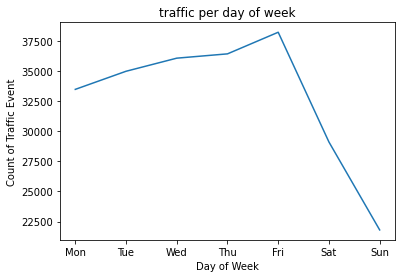

In [49]:
sns.lineplot(x=tb2.index.values, y=tb2.Traffic.values) #monday=0, tue-1, wed-2, thu-3, fri-4, sat-5, sun-6
plt.title('traffic per day of week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Traffic Event')
#plt.tick_params(axis = "x", which = "both", bottom = False, top = False)



### Hypothesis testing, emergency services has no effect on day of the week 

In [50]:
tb4=pd.crosstab(index=df['Event'],
                columns=pd.Series([i.weekday() for i in df.timeStamp]), colnames=['Day'])
tb4

Day,0,1,2,3,4,5,6
Event,,,,,,,
EMS,48750,48371,48039,47620,49368,46436,44108
Fire,14499,14311,15026,14613,15325,13898,12950
Traffic,33496,35002,36092,36450,38249,29118,21801


<AxesSubplot:ylabel='count'>

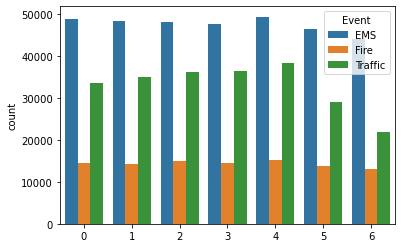

In [51]:
sns.countplot(hue=df['Event'], x=[i.weekday() for i in df.timeStamp])

In [52]:
chi, p,dof, exp=stats.chi2_contingency(tb4)
chi,p

(2629.8691696844876, 0.0)

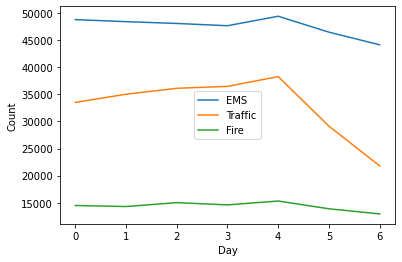

In [53]:
sns.lineplot(y=tb4.loc['EMS'], x=tb4.columns )
sns.lineplot(y=tb4.loc['Traffic'], x=tb4.columns )
sns.lineplot(y=tb4.loc['Fire'], x=tb4.columns )
plt.legend(['EMS','Traffic','Fire'])
plt.ylabel('Count')
plt.show()

In [54]:
df.twp.value_counts()

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

### check the relationship between township and hour of the day

In [55]:
# tableau

### month vs cause: 

In [56]:
df.Cause.value_counts()

VEHICLE ACCIDENT         184749
DISABLED VEHICLE          47917
FIRE ALARM                38452
FALL VICTIM               34683
RESPIRATORY EMERGENCY     34250
                          ...  
BOMB THREAT                   2
ANIMAL COMPLAINT              1
PRISONER IN CUSTODY           1
FOOT PATROL                   1
HIT + RUN                     1
Name: Cause, Length: 88, dtype: int64

In [73]:
tb6=pd.crosstab(index=df.Cause, columns=pd.Series([i.month for i in df.timeStamp]), colnames=['Month'])
tb6

Month,1,2,3,4,5,6,7,8,9,10,11,12
Cause,,,,,,,,,,,,
ABDOMINAL PAINS,873,795,835,805,786,722,779,657,667,683,632,771
ACTIVE SHOOTER,0,0,0,1,1,0,0,1,0,0,0,0
ALLERGIC REACTION,209,199,238,226,250,248,340,325,258,204,185,196
ALTERED MENTAL STATUS,968,906,953,865,871,898,896,666,724,722,723,896
AMPUTATION,8,11,10,7,10,7,9,3,11,12,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE ACCIDENT,17069,14931,15557,13584,16048,16173,15498,13246,13382,16168,15222,17871
VEHICLE FIRE,519,584,598,560,642,694,613,577,510,484,535,508
VEHICLE LEAKING FUEL,45,29,46,55,62,73,73,62,74,49,25,37


In [70]:
chi, p,dof, exp=stats.chi2_contingency(tb6)
chi,p

(9800.058303799553, 0.0)

### Event vs month

In [72]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Station,Event,Cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,<NA>,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


In [76]:
tb7=pd.crosstab(index=df.Event, columns=pd.Series([i.month for i in df.timeStamp]), colnames=['Month'])
tb7

Month,1,2,3,4,5,6,7,8,9,10,11,12
Event,,,,,,,,,,,,
EMS,30970,28329,29989,28485,29473,29512,30027,24410,23982,25025,23715,28775
Fire,9087,8092,9135,8132,8691,9879,9665,7598,7258,7683,7350,8052
Traffic,22279,19006,20903,17054,19345,20643,20140,16351,15973,18532,19117,20865


In [80]:
chi,p, dof, exp=stats.chi2_contingency(tb7)
chi, p

(893.7042140306772, 7.696220271572026e-175)

### station mapping to zip code

In [81]:
df.Station.value_counts()

308A     25346
329      21895
313      20325
381      15949
345      14504
         ...  
             9
3A3          2
56FD         1
56           1
03RAD        1
Name: Station, Length: 137, dtype: int64

In [82]:
df.zip.value_counts()

19401    45606
19464    43910
19403    34888
19446    32270
19406    22464
         ...  
8065         1
17566        1
3366         1
17810        1
19604        1
Name: zip, Length: 204, dtype: Int64

In [98]:
[df[['Station','zip','title']][df.Station=='308A'].value_counts()]

[Station  zip    title                         
 308A     19401  EMS: RESPIRATORY EMERGENCY        2704
                 EMS: CARDIAC EMERGENCY            2175
                 EMS: SUBJECT IN PAIN              2107
                 EMS: FALL VICTIM                  1584
                 EMS: UNKNOWN MEDICAL EMERGENCY    1228
                                                   ... 
          19403  EMS: DEHYDRATION                     1
                 EMS: BUILDING FIRE                   1
                 EMS: ALLERGIC REACTION               1
          19401  EMS: RESCUE - TECHNICAL              1
          17752  EMS: UNKNOWN MEDICAL EMERGENCY       1
 Length: 173, dtype: int64]

In [99]:
[df[['Station','zip']][df.Station=='308A'].value_counts()]

[Station  zip  
 308A     19401    23121
          19403      417
          19462      326
          19428      174
          19012        3
          19468        2
          19473        1
          19426        1
          19405        1
          19040        1
          19001        1
          18054        1
          17752        1
 dtype: int64]

In [106]:
[df[['Station','zip','title']][(df.zip==19401 ) & (df.title=='EMS: FALL VICTIM')].value_counts()]

[Station  zip    title           
 308A     19401  EMS: FALL VICTIM    1584
 308      19401  EMS: FALL VICTIM     819
 308B     19401  EMS: FALL VICTIM      57
 3A84     19401  EMS: FALL VICTIM       2
 EMS      19401  EMS: FALL VICTIM       1
 dtype: int64]